# Lecture 3

### Linear Regression as a Supervised Learning Method

In machine learning, we have supervised learning and unsupervised learning. 

**Supervised learning** is used when the data contains an *outcome* variable to guide the learning process. For example, Google's current method for search recommendations includes learning from prior users' clicks.

**Unsupervised learning** is used when one only observes data without outcomes. The task is to describe how the data are organized or clustered. Back to the Google example: in the early days, Google had no access to prior users' clicks. The search recommendations were done by methods such as <a href='https://en.wikipedia.org/wiki/PageRank'>PageRank</a>. 

**Note:** In this course We will be mostly focusing on supervised learning in this class.

---

#### 1) Supervised Learning

The objective of supervised learning is to build a prediction model to see the effect of some variables on certain outcome that we care about. We normally use $X$ to denote the variables we use for prediction, and they are often called **independent variables**, **predictive variables**, **predictors**, or **features**. We use $Y$ to denote the outcome we like to predict, that is also known as the **dependent variable**, **outcome**, **response**, or target. 

<p align ="center">
<img src = "
https://raw.githubusercontent.com/mohsenbayati/oit367/main/img/regressionmodel.png" width = 300 alt="Regression Model">
</p>

There are two types of supervised learning:

1. **Regression:** when outcomes are real numbers (numerical).
2. **Classification:** when outcomes are categorical variables.

In today's lecture, we will be focusing on regression, more specifically on linear regression. Next week, we will study classification via logistic regression. In weeks after that, we look at methods such as trees, random forest, and gradient boosted machines that can perform regression and classification.

---

#### 2) Linear Regression

Let's build a linear regression as our first prediction model. The example that will be used today is airfare data: $638$ instances (rows in a data frame) that contain the following information (columns):


![](https://raw.githubusercontent.com/mohsenbayati/oit367/main/img/dfnames.png)

Let's first import the packages for today.


In [41]:
import pandas as pd
import statsmodels.formula.api as smf #same functionality as R's lm
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn; seaborn.set(style='whitegrid');

`statsmodels` gives us the same variable exploration functionality as R's classic formulas and generally uses the same syntax.

Next, we load our data and look at its header rows.

In [42]:
airfares=pd.read_csv('https://raw.githubusercontent.com/mohsenbayati/oit367/main/data/airfares.csv')
airfares.head(10)

,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
0,1.02,3,No,Yes,5063.07,28637,14600,3036732,677757,Free,Free,548,10989,84.23
1,1.15,3,Yes,No,5121.24,21207,31981,2105604,4549784,Free,Free,924,9176,147.80
2,1.00,1,No,Yes,5149.03,28637,20927,3036732,1021733,Free,Free,180,7646,66.14
3,1.24,3,Yes,No,3123.35,30124,22360,5787293,1421287,Free,Free,1119,23222,117.97
4,1.02,3,No,No,5898.74,32991,25054,8621121,2374260,Free,Constrained,325,13957,169.90
5,1.04,3,No,No,5483.29,30124,31981,5787293,4549784,Controlled,Free,400,37715,132.79
6,1.05,3,No,No,4597.29,26506,27994,4459144,4948339,Free,Constrained,450,7899,175.66
7,1.13,3,No,No,4146.13,29260,30268,7830332,1106780,Controlled,Free,779,6614,240.88
8,1.17,3,Yes,No,4984.08,26506,23654,4459144,2195215,Free,Constrained,994,10640,107.51
9,1.00,3,No,Yes,8795.73,24706,29846,9056076,2237227,Free,Free,325,23041,56.43


---

#### 2.1) Our First Regression

Assuming \the effect of distance on the airfare is linear, that is

$$\textrm{FARE}=\beta_0+\beta_1\textrm{DISTANCE}+\textrm{Noise},$$

then we can use the following commands to estimate coefficients $\beta_0$ and $\beta_1$ from `airfares` data frame.

In [43]:
reg_setup_1=smf.ols(formula='FARE ~ DISTANCE', data=airfares)
model_1=reg_setup_1.fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                   FARE   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     518.1
Date:                Tue, 12 Jan 2021   Prob (F-statistic):           2.39e-84
Time:                        17:40:49   Log-Likelihood:                -3477.9
No. Observations:                 638   AIC:                             6960.
Df Residuals:                     636   BIC:                             6969.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     83.9765      4.051     20.728      0.0

**Interpretation of the coefficients** Note that the coefficient in front of `DISTANCE` is approximately $0.079$. This means that with an extra mile of distance traveled, the airfare will increase by $\$0.079$ cents. The intercept, which is $83.9765$, can be interpreted as the fact that the base airfare is starting at $\$83.98$. 



**Visual Inspection of Our First Regression**

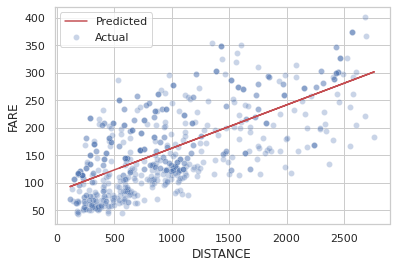

In [44]:
ax1 = seaborn.scatterplot(x='DISTANCE', y= 'FARE', data = airfares, alpha = .3, label='Actual')
ax1.plot(airfares['DISTANCE'],model_1.fittedvalues,'r', label='Predicted')
ax1.legend();

**Residuals**

The next question we wish to ask is how well does our model fit the data? This is where we define residuals, aided by this visual plot.

![](https://raw.githubusercontent.com/mohsenbayati/oit367/main/img/regression_residual.jpeg)

We can even plot the residuals directly. Residuals can be obtained by subtracting actual values of `FARE` from their predicted (fitted) values. But there is also a direct approach, using `.resid` method inside `model_1` object.




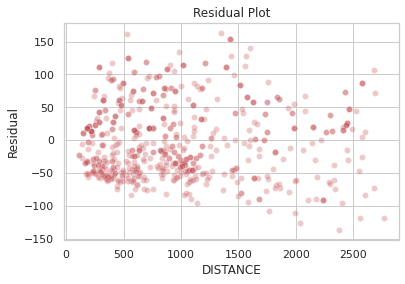

In [45]:
ax1_resid = seaborn.scatterplot(x=airfares['DISTANCE'], 
                                y=model_1.resid, 
                                alpha = .3,
                                color = 'r')
ax1_resid.set_ylabel('Residual')
ax1_resid.set_title('Residual Plot');

**Qualitative inspection of the residual plot**

Qualitatively, you would like the residual plot to be like a random noise (not show any patterns). Specifically, for different values of the x axis, you would like to see a centered distribution of the red points. Our residual plot does not show that behavior. For example, it seems for longer values of `DISTANCE` our errors are more negative. This means there is more signat that we can potentially extract from the data.

**Root Mean Square Error (RMSE)**

In this course, we use a more quantitave approach to assess the errors. We look at the Root Mean Square Error (RMSE), defined below, to asses the goodness of the fit. The nice thing about RMSE is that it has the same units as the predictor's unit which makes it more interpretable. 

The definition of RMSE is literally:

$$
\text{RMSE} = \sqrt{\frac{\text{Sum of Squares of Residuals}}{\text{Number of samples}}}
$$

Note that the residual is defined as:

$$
\text{Residual} = \text{Actual response} - \text{Predicted response}
$$ 

**Note:** There is a similar notion, called Residual Standard Error, that is almost equal to RMSE. The only difference is that the denominator is slightly different. But for large number of samples they will be very close.

$$
\text{Residual Standard Error} = \sqrt{\frac{\text{Sum of Squares of Residuals}}{\text{Number of samples}-p-1}}\,.
$$

Here, $p$ is the number of predictors. For example, for the above regression, $p$ is equal to $1$ since we have only one predictor that is `DISTANCE` .


**RMSE in Python** (Dangerous Version)

We can use the following lines to calculate RMSE in Python


In [46]:
RMSE = np.sqrt(np.mean(model_1.resid**2))
print('Root Mean Squared Error (RMSE) is: ', RMSE)

Root Mean Squared Error (RMSE) is:  56.39075657322964


**Very Important Note:** We will discuss below that the above approach to calculate RMSE, to assess performance of a prediction method is dangerous. We almost never should look at "in-sample RMSE" and instead calculate the RMSE "out-of-sample". We will do this correct version below, when we introduce training and validation sets.

---

### 2.2) Training and Validation Data

Next, we will move on to the discussion of using a training and validation to avoide overfitting. If we only focus on a data set and try to minimize the RMSE, one could do an amazing job, basically, it is possible to create a function that goes through every data point, which eventually leads to RMSE equal to 0. However, in this case, the prediction model would probably seriously suffer from the issue of *overfitting*. We overcompensated the fluctuations, and we didn't realize actually these are not consistent fluctuations. 

In many industries, when the data sets were small, normally people did not split the data set at hand into two different data set. Specifically, they would build a prediction model and evaluate it in the same data set.

However, nowadays, with tremendous datasets at hand in almost all industries, it is standard procedure to split the dataset at hand into a *training* set and the *validation* set. Some times there will also be a third data set that is called *test*. Alternatively, sometimes there are only two data sets and the term *test* set is used to refer to the *validation* data.

Overall, the idea behind splitting is to build a prediction model only on the training set, and use variables to evaluate the model's performance. Here validation set would serve the role of "future" data and help us test whether our predications are generalize-able. In our airfare prediction context, we want to make sure our validation set RMSE is as small as possible.

The following diagram gives provides a demonstration of supervised learning pipeline (Tr. refers to training and Va. refers to validation).

<p align ="center">
<img src = "
https://raw.githubusercontent.com/mohsenbayati/oit367/main/img/trainingsetvalidationset.png" width = 500 alt="Training and Validation Workflow">
</p>

There is no strict rules on the split size. But the following are some helpful guidelines:

* Training set is usually larger since training the models involves more computations and hence can benefit from more data.
* Many text books use a something between 80-20 or 60-40 split.
* If the data is very large and training is computational intensive, one may be able to train a good enough model even by a small percentage of the training set.
* Training data of less than 100 points should be avoided as much as possible.

Back to our eample, we take the first 400 rows of `airfares` as training and the rest as validation. 

In [47]:
train_indices = np.arange(400) #gives us [0,1,...399]
val_indices = np.arange(400,len(airfares)) #gives us [400... end]
training = airfares.iloc[train_indices,:]
validation = airfares.iloc[val_indices,:]

The function `iloc` allows us to select columns from the dataFrame via indices instead of column names.

**Note:** We will see in the future that when one defines the training set and the validation set, one should first randomize the data before splitting, if the dataset is not a time-series dataset.

**RMSE in Python** (Correct Version)

In [48]:
model_training_1 = smf.ols(formula='FARE ~ DISTANCE', data = training).fit()
predictions=model_training_1.predict(validation)
validationResiduals=validation['FARE']-predictions
#------------ Calculating RMSE on validation data
validationRMSE = np.sqrt(np.mean(validationResiduals**2))
print('Validation RMSE = ', validationRMSE)

Validation RMSE =  54.17267480766958


**Note:** This is completely accidental that the validation RMSE is slightly better than the one we calculated above (due to chance error). In general, validation RMSE is worse than training RMSE.

---
### 2.3) Confidence Interval and Hypothesis Testing with Regression

Recall the above regression

In [49]:
model_training_1 = smf.ols(formula='FARE ~ DISTANCE', data = training).fit()
print(model_training_1.summary())

                            OLS Regression Results                            
Dep. Variable:                   FARE   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     308.0
Date:                Tue, 12 Jan 2021   Prob (F-statistic):           1.77e-51
Time:                        17:40:50   Log-Likelihood:                -2190.2
No. Observations:                 400   AIC:                             4384.
Df Residuals:                     398   BIC:                             4392.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     85.6303      5.290     16.188      0.0

By reading the summary of statistics above, in the third column of the summary, we have the standard error. These are standard errors for the estimated coefficients. 

Thus we can calculate the $95\%$ confidence interval for the effect of the `DISTANCE` on the `FARE`: 

$$\$0.0799\pm\$(1.96\times 0.005) = \$0.0799\pm\$0.0098.$$

A shortcut (and more accurate) approach to this is to look at columns 6 and 7 of the table and view $(\$0.071, \$0.089)$ (the latter approach is more accurate since it uses $t$ distribution).

On the fourth column, we have the $t$ value. This $t$-test is to test the following hypothesis: "Is the coefficient of `DISTANCE` zero or not?". The probability is extremely small, so we can reject the null hypothesis, meaning the coefficient of `DISTANCE` is not zero. 

*If* you want to access specific $p$-value, $t$-value, or standard error for a specific variable, instead of looking at the output of the regression, you can also use the following commands, using variable `DISTANCE` as an example.

In [50]:
print('p-value for DISTANCE is',model_training_1.pvalues['DISTANCE'])
print('t-value for DISTANCE is',model_training_1.tvalues['DISTANCE'])
print('standard error for DISTANCE is',model_training_1.bse['DISTANCE'])

p-value for DISTANCE is 1.770239312325259e-51
t-value for DISTANCE is 17.549238523978094
standard error for DISTANCE is 0.0045514332008775756


**Controling for confounders** Before we start interpreting coefficients of the regression model, we need to make sure all possible factors that influence the outcome are captures by all model. For example, whether a route is a vacation route or not may change the effect of distance on airfare. Next, we build a regression that controls for a large number of factors. Specifically, we add all available features in the data. Unfortunately, `smf` library does not accept `FARE ~ .` as R does so we use the following to create the formula for all variables.


In [51]:
formula_all = 'FARE ~ ' + ' + '.join(airfares.columns.values[:-1])
print(formula_all)

FARE ~ COUPON + NEW + VACATION + SW + HI + S_INCOME + E_INCOME + S_POP + E_POP + SLOT + GATE + DISTANCE + PAX


Now, we are ready to use `smf` and run the regression.

In [52]:
reg_setup_all=smf.ols(formula= formula_all, data=training)
model_all=reg_setup_all.fit()
predictions=model_all.predict(validation)
validationResiduals=validation['FARE']-predictions
validationRMSE = np.sqrt(np.mean(validationResiduals**2))
print('Validation RMSE = ', validationRMSE)

Validation RMSE =  37.10686514580134


As we can see the validation RMSE has substantially improved which means our added variables made the model better.

Now, we print the regression output to perform our hypothesis test.

In [53]:
print(model_all.summary())

                            OLS Regression Results                            
Dep. Variable:                   FARE   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     117.9
Date:                Tue, 12 Jan 2021   Prob (F-statistic):          1.60e-125
Time:                        17:40:50   Log-Likelihood:                -1984.1
No. Observations:                 400   AIC:                             3996.
Df Residuals:                     386   BIC:                             4052.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.5996     33.415     

Now, we see that coefficient of `DISTANCE` is $0.0763$ and its $95\%$ confidence interval is $(0.067, 0.085)$.


**Note on dummy variables:** Our regression model has automatically detected that some variables `SW`, `VACATION`, `SLOT`, and `GATE` are categorical and turns them to dummy variables. For example, `SW` takes values `Yes` and `No`. The model created a dummy variable `SW[T.Yes]` which is equal to 1 when `SW=Yes` and is 0 otherwise. 

---

### 2.4 How to Improve Predictions (i.e., Reduce RMSE)


To build a prediction model, the objective is to find a model so that it minimizes its errors (the RMSE here). What are some ways to improve predictions? We have some strategies:

1. Add more variables
2. Explore non-linear relationships
3. Craft better variables (AKA **feature engineering**)
4. Minimize overfitting:<br> 
a. By using a training/validation set<br>
b. (Better) By using cross-validation

We already saw the effect of $1$ above. Next, we will focus on $2$ and $4a$ in today's lecture and leave $3$ and $4b$ to future lectures.

##### Non-linear effects

Next, we can explore **non-linear** relationships:

We will discuss two ways to do this:
1. Adding non-linear functions of numerical variables to the formulae
2. Adding interaction terms

First we study how to add quadratic, higher powers, log, exp, ... for example, here we want to add a square of the `S_POP` as our variable:

In [54]:
reg_setup_quadratic_1=smf.ols(formula='FARE ~ S_POP+I(S_POP**2)', data=airfares)
model_quadratic_1=reg_setup_quadratic_1.fit()
print(model_quadratic_1.summary())

                            OLS Regression Results                            
Dep. Variable:                   FARE   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     13.68
Date:                Tue, 12 Jan 2021   Prob (F-statistic):           1.53e-06
Time:                        17:40:50   Log-Likelihood:                -3654.5
No. Observations:                 638   AIC:                             7315.
Df Residuals:                     635   BIC:                             7328.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       115.0544      9.589     11.998

**Note:** The function `I()` can be used to bracket those portions of a model formula where the operators are used in their arithmetic sense.

The more important question is to think what to add when exploring non-linear relationships. Sometimes, we can plot the graph, and based on the graph, to try to experiment with what to add to the prediction model.

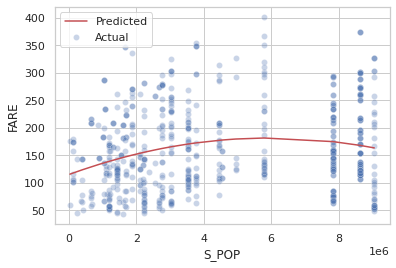

In [55]:
ax_quadratic_1 = seaborn.scatterplot(x='S_POP', y= 'FARE', data = airfares, alpha = .3, label='Actual')
order = np.argsort(airfares['S_POP'])
ax_quadratic_1.plot(airfares['S_POP'][order],model_quadratic_1.fittedvalues[order],'r', label='Predicted')
ax_quadratic_1.legend();

**Another way** to include non-linear relationships is to add interaction terms. For example, the next cell shows how we can add interaction term `DISTANT` $\times$ `VACATION` in the model

In [56]:
reg_setup_interaction_1 = smf.ols(formula='FARE ~ DISTANCE * VACATION', data = airfares)
model_interaction_1=reg_setup_interaction_1.fit()
print(model_interaction_1.summary())

                            OLS Regression Results                            
Dep. Variable:                   FARE   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     290.3
Date:                Tue, 12 Jan 2021   Prob (F-statistic):          1.52e-118
Time:                        17:40:50   Log-Likelihood:                -3392.2
No. Observations:                 638   AIC:                             6792.
Df Residuals:                     634   BIC:                             6810.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

**Interpreting Interaction Term:** Let's interpret the summary of the statistics shown above. If we want to summarize the effect of `DISTANCE` on `FARE`, now we should report that when the flight is for vacation, then the effect of `DISTANCE` becomes $0.09 + (-0.0331) \approx 0.06$, meaning with an extra mile traveled, the airfare will increase by $0.06$ dollars. If the flight is a non-vacation route, the distance effect on airfare is $0.09$ dollars.

Note that the effect of distance on fare is *non-linear* since it depends on whether the flight is for vacation or not. We can also see this via the following visual inspection.

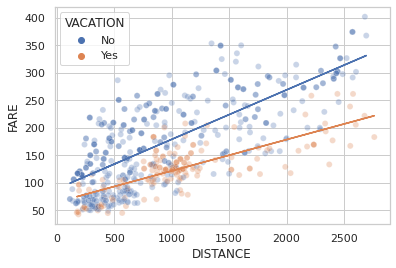

In [57]:
ax_interaction_1 = seaborn.scatterplot(x='DISTANCE', 
                                       y= 'FARE', 
                                       data = airfares, 
                                       alpha = .3, 
                                       hue='VACATION')

vacation_yes = airfares['VACATION']=='Yes'

ax_interaction_1.plot(airfares[~vacation_yes]['DISTANCE'],
                      model_interaction_1.predict(airfares[~vacation_yes]),
                      label='Predicted (Vac. = No)')
ax_interaction_1.plot(airfares[vacation_yes]['DISTANCE'],
                      model_interaction_1.predict(airfares[vacation_yes]),
                      label='Predicted (Vac. = Yes)');

**Some syntax notes:** 

Consider the simple regression `FARE ~ DISTANCE`:

* If you want to exclude the intercept term, you can use the formula `FARE~DISTANCE -1`
* The variable `NEW` is numerical, but it takes values 0, 1, 2, or 3. If you like to see how it would change the results if you consider it as a categorical variable, you can enforce the regression to tread as categorical by the following syntax: `FARE~DISTANCE + C(NEW)`.
* For interaction terms, if you consider `FARE ~ DISTANCE*COUPON` it will create a product variable for `DISTANCE` and `COUPON`, denoted by `DISTANCE:COUPON` in Python, as well as individual variables for `DISTANCE` and `COUPON`. If you want to just include the product term, you should use the formula `FARE~DISTANCE:COUPON`.

More details on regression formula syntax can be found in <a href='https://patsy.readthedocs.io/en/latest/formulas.html'>this page</a>.

In [58]:
lm_interaction_I = smf.ols(formula='FARE ~ DISTANCE*COUPON', data = airfares)
print(lm_interaction_I.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   FARE   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     177.7
Date:                Tue, 12 Jan 2021   Prob (F-statistic):           1.35e-83
Time:                        17:40:51   Log-Likelihood:                -3473.3
No. Observations:                 638   AIC:                             6955.
Df Residuals:                     634   BIC:                             6972.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.7120     32.766     

---

### 3) Visual Exploration of Pairwise Variables

One approach to explore the data for potential non-linear relationships is to use the following command <font color='#CB2B44'>(warning: the comamnd may take a while to run)</font>

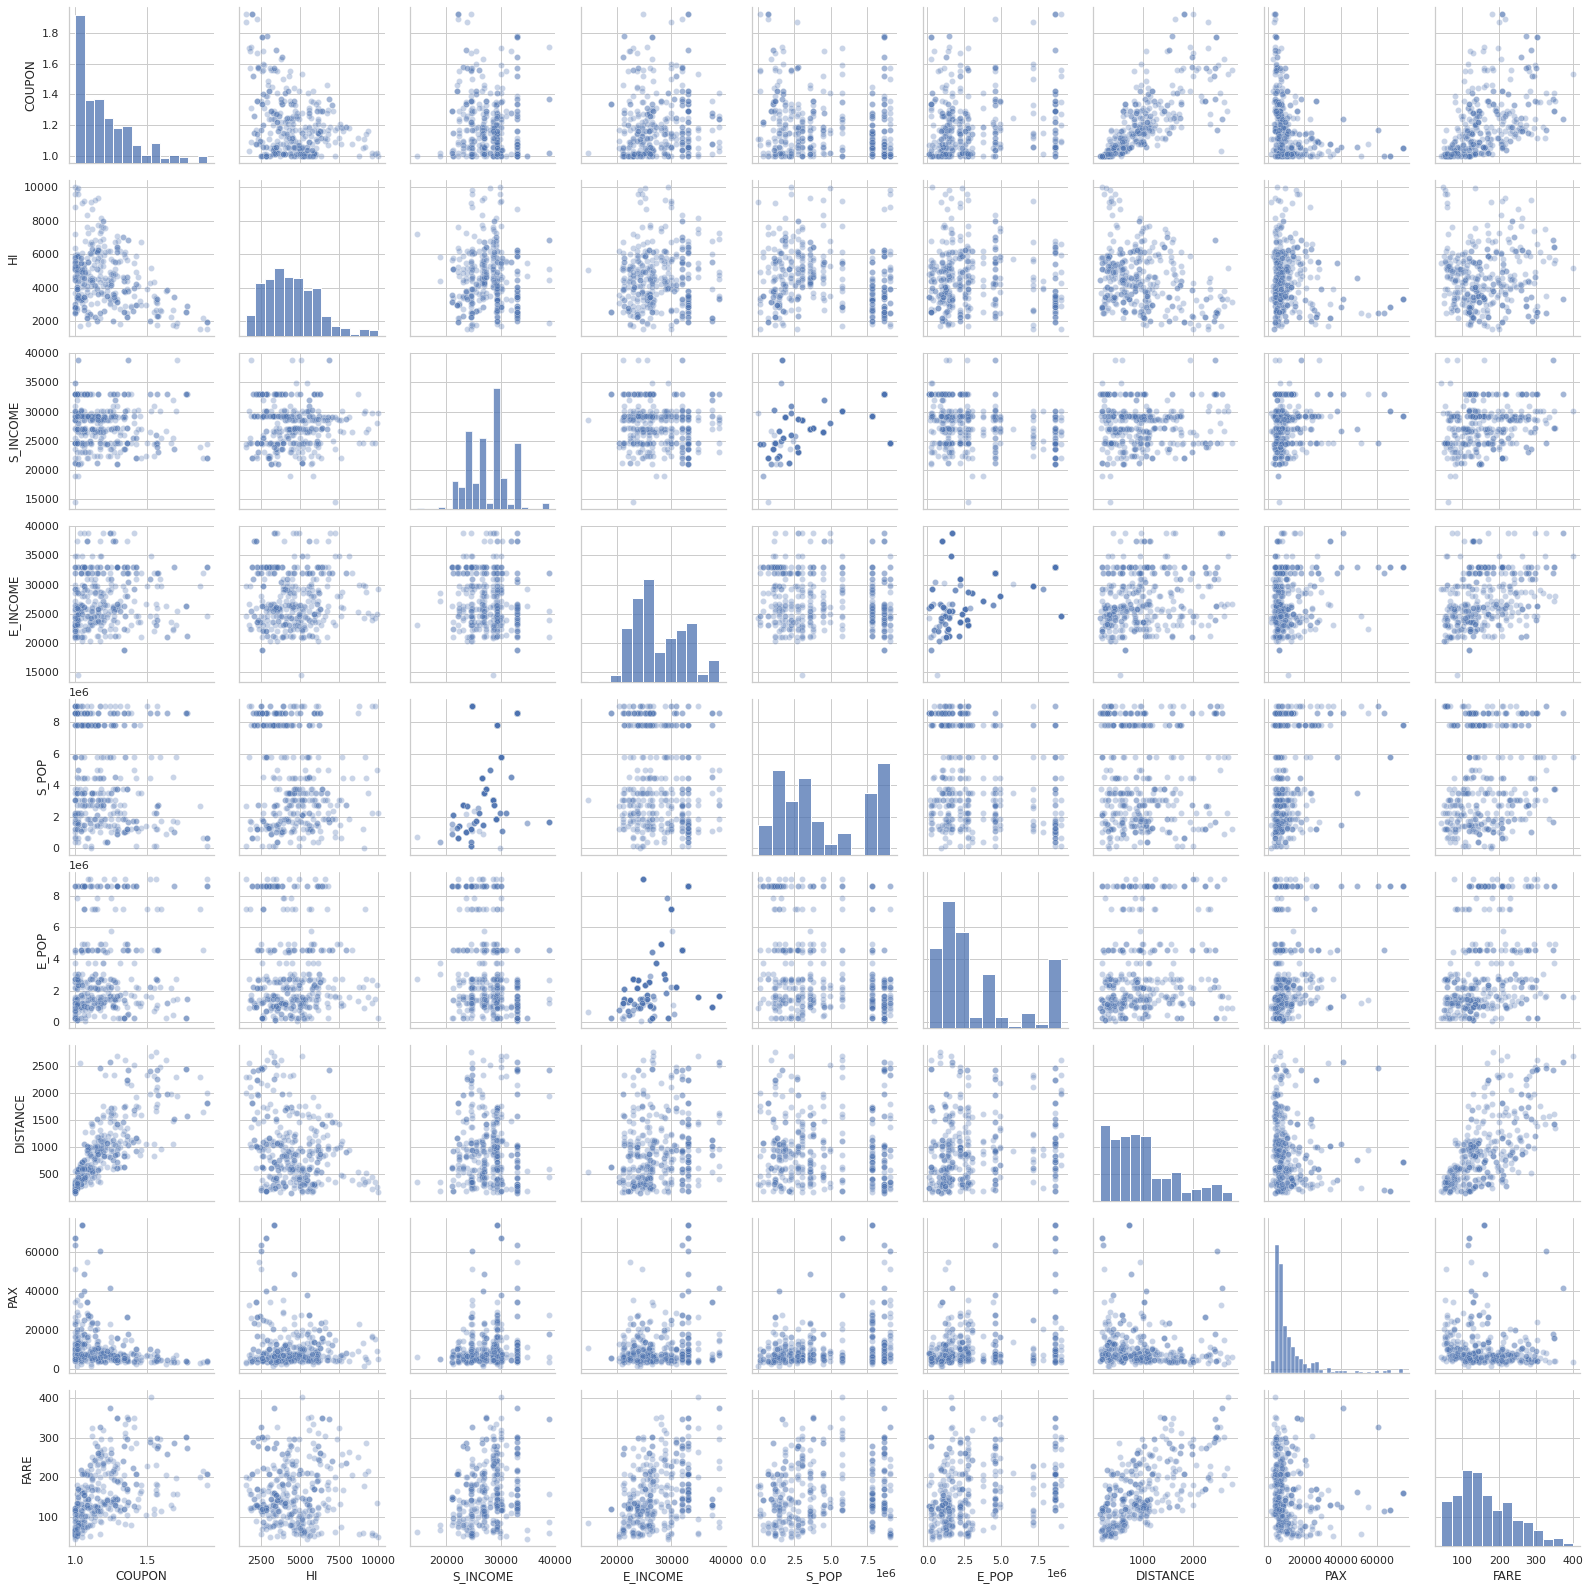

In [59]:
numerical_features = ["COUPON","HI", "S_INCOME", "E_INCOME", "S_POP", "E_POP", "DISTANCE", "PAX", "FARE"]
seaborn.pairplot(data=training[numerical_features], kind='scatter', plot_kws = {'alpha': 0.3});

---

### 4) Another Performance Measure: $R^2$

In the above we introduced RMSE as a performance measure to assess accuracy or fit of a regression model. There is another well-known measure that is called **R-Squared**. In this course we de-emphasize this and use RMSE mostly. But for completeness, let us introduce and calculate it in our settig.

Consider the base regression `FARE ~ DISTANCE`.

**Definition:**  The proportion of `FARE`’s total uncertainty that is due to `DISTANCE` can be measured using:


$$R^2 = 1 - \frac{\text{Var(Residuals)}}{\text{Var(FARE)}}$$


* If $R^2  = 1$, the `FAR` is perfectly explained by the `DISTANCE` (all of the points lie on the line).


* If $R^2  = 0$, the `DISTANCE` provides no information about the `FARE`.


In our example $R^2 = 0.436$ which can be obtained by the following code


In [60]:
print(model_training_1.rsquared)

0.43624127717930583


which means almost 45% of the fluctuations in `FARE` can be explained by fluctuations in the `DISTANCE`

<p align ="center">
<img src = "
https://raw.githubusercontent.com/mohsenbayati/oit367/main/img/R-squared.png" width = 500 alt="Training and Validation Workflow">
</p>
Unobserved factors mean any variable other than what we used in the regression (i.e., `DISTANCE`)

Like RMSE, correct way of calculating $R^2$ is to use the validation set, rather than the one calculated using the training set. Specifically, we can use the following code.

In [61]:
model_training_1 = smf.ols(formula='FARE ~ DISTANCE', data = training).fit()
predictions=model_training_1.predict(validation)
validationResiduals=validation['FARE']-predictions
#------------ Calculating RMSE on validation data
validation_R2 = 1 - np.var(validationResiduals)/np.var(validation['FARE'])
print('Validation R2 = ', validation_R2)

Validation R2 =  0.47489796010747354


---


### 5) Class Exercises



#### Q1) What is the average `FARE` when `VACATION` is Yes (use all of the data)?

In [62]:
vector = airfares['FARE'][airfares['VACATION']=="Yes"]
np.mean(vector)

125.98088235294105

#### Q2) What is the validation set RMSE for predicting `FARE`, using only variable `COUPON`?

In [63]:
model_Q2 = smf.ols(formula='FARE ~ COUPON', data = training).fit()
predictions=model_Q2.predict(validation)
validationResiduals=validation['FARE']-predictions
#------------ Calculating RMSE on validation data
validationRMSE = np.sqrt(np.mean(validationResiduals**2))
print('Validation RMSE = ', validationRMSE)

Validation RMSE =  64.77879472113013


#### Q3) What is the validation RMSE for predicting `FARE` using two variable `S_INCOME` and `COUPON`?

In [64]:
model_Q3 = smf.ols(formula='FARE ~ S_INCOME + COUPON', data = training).fit()
predictions=model_Q3.predict(validation)
validationResiduals=validation['FARE']-predictions
#------------ Calculating RMSE on validation data
validationRMSE = np.sqrt(np.mean(validationResiduals**2))
print('Validation RMSE = ', validationRMSE)

Validation RMSE =  62.58806964160726


#### Q4) Using the regression with all variables (estimated on the training set), what is the $p$-value of the following hypothesis "`S_POP` has no effect on `FARE`"? (Hint: we are testing the hypothesis that coefficient of `S_POP` is zero).

In [65]:
model_Q4 = smf.ols(formula=formula_all, data=training).fit()
print(model_Q4.summary())

                            OLS Regression Results                            
Dep. Variable:                   FARE   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     117.9
Date:                Tue, 12 Jan 2021   Prob (F-statistic):          1.60e-125
Time:                        17:41:26   Log-Likelihood:                -1984.1
No. Observations:                 400   AIC:                             3996.
Df Residuals:                     386   BIC:                             4052.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.5996     33.415     

The pvalue for this hypothesis is very close to $0$ as $t>5$. We can also obtain its precise value by the following:

In [66]:
print('p-value is',model_Q4.pvalues['S_POP'])

p-value is 0.00012506998034547828


#### Q5) Build a 95% confidence interval for the effect of `COUPON` on `FARE` (use the regression on all variables and the training data)?

In [67]:
model_Q5 = smf.ols(formula=formula_all, data = training).fit()
print(model_Q5.summary())

                            OLS Regression Results                            
Dep. Variable:                   FARE   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     117.9
Date:                Tue, 12 Jan 2021   Prob (F-statistic):          1.60e-125
Time:                        17:41:26   Log-Likelihood:                -1984.1
No. Observations:                 400   AIC:                             3996.
Df Residuals:                     386   BIC:                             4052.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.5996     33.415     

The interval is outputted by Python (last two columns of the table) which is $(-39.315, 22.137)$ dollars.

#### Q6) Is there a significant interaction between the effect of `DISTANCE` and `SW` on `FARE`? (Hint: start with the regression on all variables on the training set and add interaction term between `SW` and `FARE`)

In [68]:
model_Q6 = smf.ols(formula= formula_all + ' + SW*DISTANCE' , data=training).fit()
print(model_Q6.summary())

                            OLS Regression Results                            
Dep. Variable:                   FARE   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     109.7
Date:                Tue, 12 Jan 2021   Prob (F-statistic):          8.50e-125
Time:                        17:41:26   Log-Likelihood:                -1983.3
No. Observations:                 400   AIC:                             3997.
Df Residuals:                     385   BIC:                             4057.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.1448     33

The coefficient of `SW[T.Yes]:DISTANCE` has a p-value $0.223$ which means the effect is not statistically significant. Therefore, there is no significant interactio between `SW` and `DISTANCE`.

#### Q7) Look at the regression with all variables on the training set, what is the standard error (SE) for coefficient of `COUPON`?

In [69]:
model_Q7 = smf.ols(formula=formula_all, data = training).fit()
print(model_Q7.summary())

                            OLS Regression Results                            
Dep. Variable:                   FARE   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     117.9
Date:                Tue, 12 Jan 2021   Prob (F-statistic):          1.60e-125
Time:                        17:41:26   Log-Likelihood:                -1984.1
No. Observations:                 400   AIC:                             3996.
Df Residuals:                     386   BIC:                             4052.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.5996     33.415     

The standard error(SE) for coefficient of COUPON is $15.62$.

#### Q8) (Challenge question) What is the p-value of the following hypothesis "Coefficient of `VACATION=Yes` is $-33$" (use the training set and all variables)?

When the null hypothesis is nonzero, we just subtract this mean from the estimated mean in the numerator of the $t$-value and then use the same old formulas.

In [70]:
print(model_all.summary())

                            OLS Regression Results                            
Dep. Variable:                   FARE   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     117.9
Date:                Tue, 12 Jan 2021   Prob (F-statistic):          1.60e-125
Time:                        17:41:26   Log-Likelihood:                -1984.1
No. Observations:                 400   AIC:                             3996.
Df Residuals:                     386   BIC:                             4052.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.5996     33.415     

In [71]:
nullCoefficient = -33 # the hypothesis mean
observedCoefficient = -42.4373
SE_of_difference = 4.481
tvalue = (observedCoefficient-nullCoefficient)/SE_of_difference
pval = 2*norm.cdf(-abs(tvalue))
print('p-value of the hypothesis = ',pval)

p-value of the hypothesis =  0.03519826590735256


 #### Q9) (Challenge question) What is the lowest RMSE on the training set, one can achieve? (no need to run any code, this is a conceptual question)?

**Answer:** zero. By adding more variables than the training set, could be completely irrelevant (noise) variables, you can always perfectly fit the data and make the trianing RMSE equal to zero.

#### Q10) (Can be challenging if you become competitive!) What is the lowest RMSE you can achieve on the validation set?

Looking at the last row of the above `pairplot`, we notice and the values of the variable `PAX` are clustered near 0. Specifically, this plot:


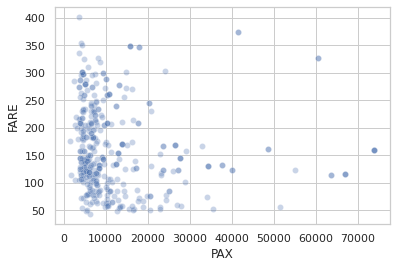

In [72]:
seaborn.scatterplot(x='PAX', y='FARE',data=training, alpha=.3);

This suggests perhaps using a log transformation for `PAX` could help spread the data better.

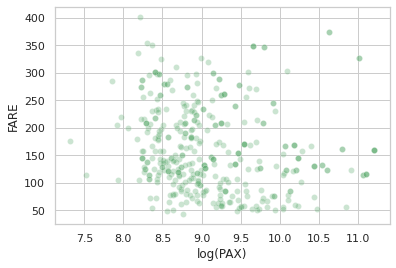

In [73]:
ax_Q10 = seaborn.scatterplot(x=np.log(training['PAX']),
                    y=training['FARE'],
                    alpha=.3,
                    color='g')

ax_Q10.set_xlabel('log(PAX)');

The new graph indeed shows some type of negative correlation. Therefore, we will use the regression on all variables but instead of PAX use its logarithm.

In [74]:
model_Q10 = smf.ols(formula='FARE ~ VACATION + SW + HI + S_INCOME + E_INCOME + S_POP + E_POP + SLOT + GATE + DISTANCE + I(np.log(PAX)) + NEW + COUPON', data = training).fit()
predictions = model_Q10.predict(validation)
validationResiduals = validation['FARE']-predictions
validationRMSE = np.sqrt(np.mean(validationResiduals**2))
print('Validation RMSE of the new model =',validationRMSE)

Validation RMSE of the new model = 36.303536698883924


Indeed, this change helps lower our validation RMSE slightly.

#### Q11) (Challenge question, should keep you busy!) One concern with the above analysis is that we kept using the same validation set, over and over again. This could lead to over-fitting to the validation set. The following approach would be a safer way to assess a model's validation RMSE.

Take the regression on all variables. 

* Repeat the following steps 5 times
a. Split the data randomly to a new training and validation set
b. Train the regression on the new training set and check its RMSE on the new validation.

Now, you have 5 different RMSEs. Report their average as a more accurate version of validation RMSE for the regression on all variables. 

Now, apply the same protocol to the regression you found in your answer to Q10. Do you still believe your model is better than the regression on all variables?




In [75]:
n_data = len(airfares)
n_rep = 5
rmse_list = np.zeros(n_rep)

for i in range(n_rep):
  airfares_row_shuffled = airfares.iloc[np.random.choice(np.arange(n_data),n_data,replace=False),:].reset_index(drop=True) # Shuffles rows of airfares
  training_new = airfares_row_shuffled.iloc[0:400,:]
  validation_new = airfares_row_shuffled.iloc[400:,]
  model_all_new = smf.ols(formula = formula_all, data = training_new).fit()
  predictions_new = model_all_new.predict(validation_new)
  rmse_list[i] = np.sqrt(np.mean((validation_new['FARE']-predictions_new)**2))
  print('Repetition',i,': RMSE =',rmse_list[i])  
print('----------------')
print('Average RMSE accross',n_rep,
      'repetitions is',np.mean(rmse_list),
      'with standard error around',np.std(rmse_list)/np.sqrt(n_rep))

Repetition 0 : RMSE = 35.642778735887006
Repetition 1 : RMSE = 35.16458554068054
Repetition 2 : RMSE = 37.04395089905076
Repetition 3 : RMSE = 35.920182134183484
Repetition 4 : RMSE = 37.63988820515832
----------------
Average RMSE accross 5 repetitions is 36.28227710299202 with standard error around 0.4104904497186965


Now, we check the same procedure with our regression for Q10.

In [76]:
Q10_formula = 'FARE ~ VACATION + SW + HI + S_INCOME + E_INCOME + S_POP + E_POP + SLOT + GATE + DISTANCE + I(np.log(PAX)) + NEW + COUPON'


for i in range(n_rep):
  airfares_row_shuffled = airfares.iloc[np.random.choice(np.arange(n_data),n_data,replace=False),:].reset_index(drop=True) # Shuffles rows of airfares
  training_new = airfares_row_shuffled.iloc[0:400,:]
  validation_new = airfares_row_shuffled.iloc[400:,]
  model_all_new = smf.ols(formula = Q10_formula, data = training_new).fit()
  predictions_new = model_all_new.predict(validation_new)
  rmse_list[i] = np.sqrt(np.mean((validation_new['FARE']-predictions_new)**2))
  print('Repetition',i,': RMSE =',rmse_list[i])  
print('----------------')
print('Average RMSE accross',n_rep,
      'repetitions is',np.mean(rmse_list),
      'with standard error around',np.std(rmse_list)/np.sqrt(n_rep))

Repetition 0 : RMSE = 34.947857270109225
Repetition 1 : RMSE = 32.789552268826405
Repetition 2 : RMSE = 35.36341437676595
Repetition 3 : RMSE = 37.305308253752806
Repetition 4 : RMSE = 35.421370532054944
----------------
Average RMSE accross 5 repetitions is 35.16550054030186 with standard error around 0.6442333481487951


Indeed, we see that average RMSE is lower for our answer to Q10 than the regression on all variables.